In [1]:
import os
import json
import time
import random
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from gensim.models import FastText
import matplotlib.pyplot as plt
import operator
from collections import Counter

In [2]:
INDIR = 'data'
game_dir = os.path.join(INDIR, 'reviews_Video_Games_5_processed.json')
with open(game_dir, 'r') as f:
    games = json.load(f)

# Convert data from json to csv
games = pd.DataFrame.from_dict(games)

In [3]:
games['reviews_clean'][0]

'installing game struggle games windows live bugs championship races cars unlocked buying addon game paid nearly 30 dollars game new don like idea keep paying keep playing noticed no improvement physics graphics compared dirt 2 tossed garbage vowed never buy another codemasters game really tired arcade style rally racing games anyway continue get fix richard burns rally smile reading review enjoyed sure rate helpful'

In [116]:
len(games)

231780

In [115]:
games['overall'].value_counts()

5.0    120185
4.0     54804
3.0     28275
1.0     14853
2.0     13663
Name: overall, dtype: int64

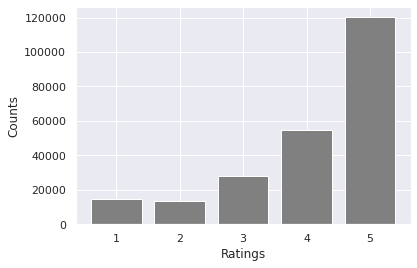

In [43]:
from collections import Counter
y = [y for y in games['overall']]
Counter(y).keys()
Counter(y).values()
plt.bar(Counter(y).keys(), Counter(y).values(), 
        color='grey')
# plt.title('Counts for each rating')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.savefig('PNG/counts_for_ratings.png', dpi=300)

### Count the frequency of each word

In [5]:
import operator
from collections import Counter

In [5]:
# def word_count(sentence: str):
#     counts = dict()
#     words = sentence.split()

#     for word in words:
#         if word in counts:
#             counts[word] += 1
#         else:
#             counts[word] = 1

#     return counts

In [4]:
from itertools import tee, islice
def ngrams(lst, n):
    tlst = lst
    while True:
        a, b = tee(tlst)
        l = tuple(islice(a, n))
        if len(l) == n:
            yield l
            next(b)
            tlst = b
        else:
            break
# Counter(ngrams(words, 3))

In [5]:
rating_df = games.groupby('overall')['reviews_clean'].apply(list).reset_index()

In [7]:
rating_df

overall                                      reviews_clean
0      1.0  [installing game struggle games windows live b...
1      2.0  [still haven figured one everything instructed...
2      3.0  [got version instead ps3 version turned mistak...
3      4.0  [like rally cars get game fun more oriented 34...
4      5.0  [loved playing dirt 2 thought graphics good pu...

In [ ]:
n = 1
word_frequency = {}
for i in range(len(rating_df)):
    rating = rating_df['overall'][i]
    counter_sum = Counter()
    for j in rating_df['reviews_clean'][i]:
        counter_sum += Counter(ngrams(j.split(), n))
    word_frequency[rating] = counter_sum

##### Process the keys from tuple to string

In [ ]:
word_frequency_ = {}
for k in word_frequency.keys():
    word_frequency_[k] = {}
    for k_, v_ in word_frequency[k].items():
        word_frequency_[k][k_[0]] = v_

In [10]:
INDIR = 'data/'
word_freq_dir = os.path.join(INDIR, 'word_frequency.json')
with open(word_freq_dir, 'w') as f:
    json.dump(word_frequency_, f, indent=4)

### Load word frequency dictionary

In [3]:
INDIR = 'data/'
word_freq_dir = os.path.join(INDIR, 'word_frequency.json')
with open(word_freq_dir, 'r') as f:
    word_frequency = json.load(f)

### Plot a graph to show the threshold and select Top N words

In [6]:
sum_words = Counter()
for k, v in word_frequency.items():
    sum_words += v

In [7]:
sorted_words = sorted(sum_words.items(), key=operator.itemgetter(1), reverse=True)

In [8]:
dict(sorted_words[0:200]).values()

dict_values([805927, 263104, 227404, 198637, 198348, 170101, 170029, 160574, 130215, 129460, 126965, 126667, 122986, 121631, 105642, 103958, 102141, 100768, 98265, 97084, 95071, 88674, 88351, 86490, 84333, 82548, 76520, 73519, 71291, 69262, 68764, 66192, 64277, 63452, 63034, 61859, 61042, 60303, 59998, 56531, 55179, 54987, 54954, 53583, 52215, 52067, 51688, 51076, 50330, 50192, 49342, 49204, 48272, 47913, 47873, 47340, 46617, 46490, 46222, 46055, 45641, 45428, 45050, 43585, 42980, 42679, 42542, 42070, 41908, 41614, 41226, 41157, 40599, 40553, 40294, 39683, 38726, 38604, 38310, 38231, 37636, 37617, 37553, 37281, 37241, 36924, 36663, 36621, 36373, 36349, 36266, 36243, 35814, 35658, 35386, 35368, 34883, 34362, 33500, 33454, 33263, 33127, 33113, 32655, 32558, 32404, 32141, 32123, 32076, 31676, 31538, 31504, 31092, 30734, 30501, 29971, 29938, 29862, 29777, 29516, 29430, 29124, 28766, 28448, 28366, 27919, 27917, 27543, 27371, 27271, 27232, 27118, 27028, 26933, 26841, 26818, 26547, 26052, 260

In [9]:
import math

In [10]:
log_10_values = [math.log(y, 10) for y in list(dict(sorted_words[0:200]).values())]

In [36]:
mean_ = np.mean(log_10_values)
mean_

4.590037749518793

In [37]:
median_ = np.median(log_10_values)
median_

4.523204734184748

In [38]:
std_ = np.std(log_10_values)
std_

0.26148092838749304

/home/chrys/mypy/msc/gitlab/recommender-system/env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


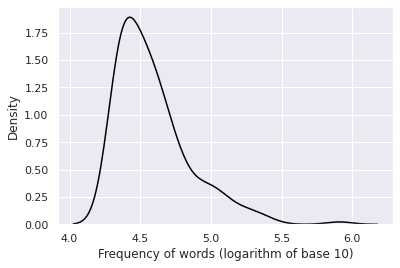

In [40]:
import seaborn as sns
sns.set(font_scale=1)
ax = sns.distplot(log_10_values, hist=False, color='black')
ax.set(xlabel='Frequency of words (logarithm of base 10)', ylabel='Density')
# ax.set_title('Density Plot of Word Frequency', fontsize=12)
plt.savefig('PNG/word_density.png', dpi=300)

##### Based on the density plot above, we should set the threshold at around 50000. Hence, we select the top 200 words with count >= 47346

In [21]:
top_n = dict(sorted_words[0:200])

In [17]:
top_n

{'game': 805927,
 'not': 263104,
 'like': 227404,
 'one': 198637,
 'games': 198348,
 'get': 170101,
 'more': 170029,
 'play': 160574,
 'good': 130215,
 'very': 129460,
 'time': 126965,
 'really': 126667,
 'great': 122986,
 'fun': 121631,
 'much': 105642,
 'no': 103958,
 'also': 102141,
 'first': 100768,
 'even': 98265,
 'well': 97084,
 'would': 95071,
 'new': 88674,
 'don': 88351,
 'graphics': 86490,
 'story': 84333,
 '2': 82548,
 'playing': 76520,
 'still': 73519,
 'most': 71291,
 'way': 69262,
 'better': 68764,
 'played': 66192,
 '3': 64277,
 'make': 63452,
 'many': 63034,
 'go': 61859,
 'best': 61042,
 'use': 60303,
 'lot': 59998,
 'little': 56531,
 'want': 55179,
 'gameplay': 54987,
 'characters': 54954,
 'people': 53583,
 'back': 52215,
 'pretty': 52067,
 'could': 51688,
 'system': 51076,
 'see': 50330,
 'buy': 50192,
 'different': 49342,
 'think': 49204,
 'find': 48272,
 'say': 47913,
 'character': 47873,
 'around': 47340,
 'level': 46617,
 'love': 46490,
 'though': 46222,
 'play

### Get the count for each of the top 50 words from each rating

##### get the count from word_frequency (dictionary of counter)

In [22]:
top_n_dict = {}
for r in word_frequency.keys():
    top_n_dict[r] = {}
    for k in top_n.keys():
        top_n_dict[r][k] = word_frequency[r][k]

### Normalize the count within each rating

In [23]:
for r in top_n_dict.keys():
    sum_words = sum(top_n_dict[r].values())
    for k, v in top_n_dict[r].items():
        top_n_dict[r][k] = v / sum_words

##### Notice that normalizing the count produce proportion which is a type of composite data

### Use centered log ratio to transform the proportional data

In [20]:
import math

In [24]:
for r in top_n_dict.keys():
    for k, v in top_n_dict[r].items():
        top_n_dict[r][k] = math.log(v)

In [25]:
ncol = 200
for r in top_n_dict.keys():
    rowsum = sum(top_n_dict[r].values())
    for k, v in top_n_dict[r].items():
        top_n_dict[r][k] = v - (rowsum / ncol)

### Calculate the variance for each word and keep subset of vocab with large variance

In [26]:
top_n_df = pd.DataFrame.from_dict(top_n_dict, orient='index')

In [27]:
top_n_df

game       not      like       one     games       get      more  \
1.0  3.209124  2.296893  1.808948  1.643463  1.603326  1.578447  1.243631   
2.0  3.082959  2.132099  1.834981  1.601882  1.478019  1.506065  1.412698   
3.0  3.032034  2.058856  1.832325  1.545628  1.470838  1.498154  1.500140   
4.0  3.002526  1.910118  1.797871  1.581974  1.555665  1.478875  1.542305   
5.0  3.044620  1.784712  1.729812  1.714767  1.766462  1.474045  1.479150   

         play      good      very  ...       etc    either      said  \
1.0  1.525049  1.014678  0.989777  ... -0.811727 -0.432052 -0.382650   
2.0  1.335614  1.157476  1.192220  ... -0.664703 -0.370740 -0.612706   
3.0  1.315305  1.293735  1.186320  ... -0.684048 -0.443637 -0.567131   
4.0  1.383747  1.348382  1.247549  ... -0.611762 -0.620257 -0.623104   
5.0  1.495514  1.129184  1.226449  ... -0.611601 -0.808883 -0.715043   

      instead     least   thought     looks   console     super      star  
1.0 -0.259694 -0.303962 -0.218602 -0.505418 -0.346583 -1.034577 -0.298320  
2.0 -0.236518 -0.301379 -0.370188 -0.534885 -0.855212 -1.043110 -0.595266  
3.0 -0.407269 -0.425418 -0.568942 -0.615620 -0.915187 -0.895736 -0.685404  
4.0 -0.614918 -0.633390 -0.742146 -0.686827 -0.830808 -0.815441 -0.543333  
5.0 -0.912597 -0.862884 -0.718303 -0.659815 -0.481132 -0.430712 -0.797036  

[5 rows x 200 columns]

In [28]:
variance = top_n_df.var()

In [29]:
variance

game       0.006518
not        0.039203
like       0.001819
one        0.004202
games      0.014522
             ...   
thought    0.051072
looks      0.006136
console    0.064826
super      0.062566
star       0.034765
Length: 200, dtype: float64

In [30]:
sorted_variance = variance.sort_values(ascending=True)

In [31]:
sorted_variance

first      0.000162
long       0.000377
real       0.000404
need       0.000663
think      0.001065
             ...   
bad        0.189639
nothing    0.191693
awesome    0.294968
amazing    0.312134
money      0.389169
Length: 200, dtype: float64

In [33]:
x = [x_[0] for x_ in list(sorted_variance.index)]

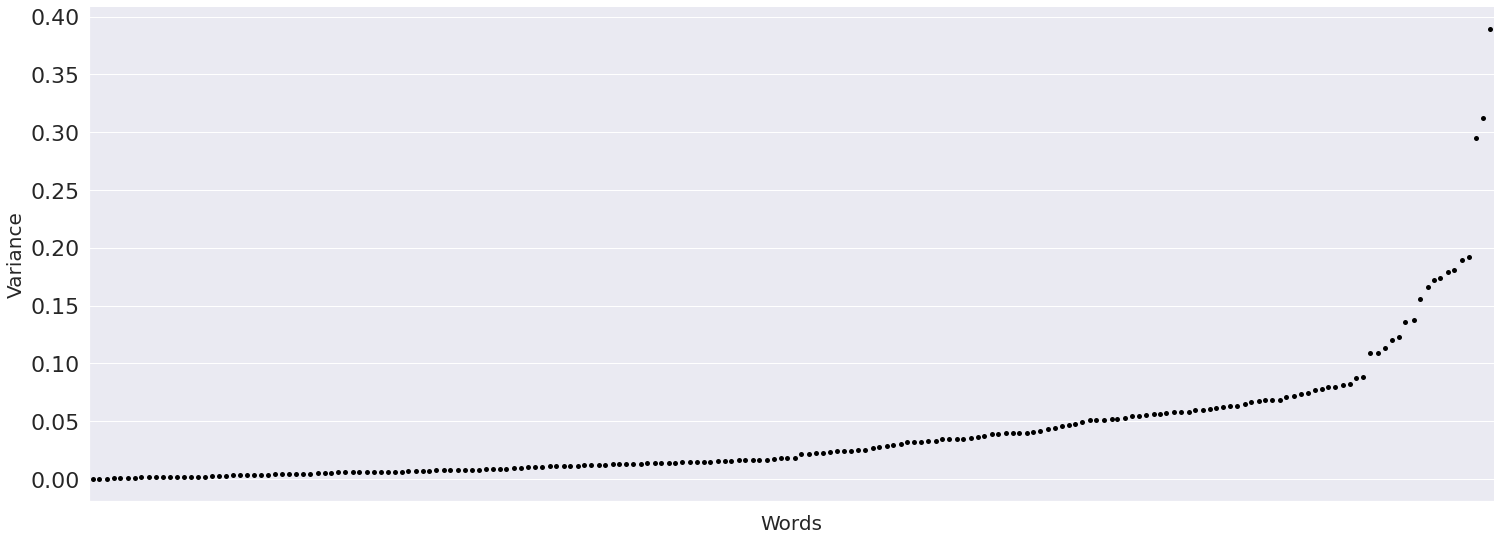

In [35]:
sns.set(font_scale = 2)
ax = sns.catplot(x=list(sorted_variance.index), y=sorted_variance.values, data=sorted_variance, height=8, aspect=3, color='black')
# x = [x_ for x_ in list(sorted_variance.index)]
ax.set_xticklabels([], rotation=90)
ax.set_axis_labels('Words', 'Variance', fontsize=20)
# .ax.set_title('Plot of sorted variance', fontsize=26))
plt.savefig('PNG/variance_plot.png')

### Drop the words with variance smaller than 0.4

##### There are 199 words (top 199 words in sorted_variance) with variance smaller than 0.4

In [41]:
to_drop = x[:-1]

In [43]:
# save
INDIR = 'data/'
to_drop_dir = os.path.join(INDIR, 'to_drop.json')
with open(to_drop_dir, 'w') as f:
    json.dump(to_drop, f, indent=4)

In [44]:
# load
INDIR = 'data/'
to_drop_dir = os.path.join(INDIR, 'to_drop.json')
with open(to_drop_dir, 'r') as f:
    to_drop = json.load(f)

In [45]:
to_drop

['gameplay',
 'far',
 'etc',
 'most',
 'looking',
 'multiplayer',
 'take',
 'player',
 'done',
 'find',
 'big',
 'many',
 'very',
 'makes',
 'use',
 'character',
 'real',
 'first',
 'always',
 'long',
 'things',
 'more',
 'graphics',
 'much',
 'around',
 'need',
 'using',
 'hard',
 'series',
 'think',
 'keep',
 'come',
 'part',
 'players',
 'really',
 'like',
 'level',
 'experience',
 'may',
 'fan',
 'used',
 'playing',
 'worth',
 'two',
 'feel',
 'old',
 'better',
 'good',
 'getting',
 'found',
 'still',
 'original',
 'sound',
 'one',
 'get',
 'time',
 'price',
 'enough',
 'probably',
 'might',
 'sure',
 'set',
 'yet',
 'say',
 'new',
 'control',
 'see',
 'system',
 'look',
 'since',
 'last',
 'mode',
 'start',
 '5',
 'looks',
 'go',
 'without',
 'actually',
 '4',
 'almost',
 'well',
 'able',
 'games',
 'play',
 'hours',
 'game',
 'battle',
 'give',
 'side',
 'enemies',
 'everything',
 'fact',
 'main',
 'screen',
 'world',
 'little',
 'move',
 'way',
 'played',
 'right',
 'combat',
 '

##### Drop the low variance words from the dataframe

In [47]:
remove_low_variance_words = []
for x in games['reviews_clean']:
    processed = [x_ for x_ in x.split() if x_ not in to_drop]
    remove_low_variance_words.append(' '.join(processed))

In [56]:
games['reviews_clean'] = remove_low_variance_words

In [58]:
games = games.to_dict('records')

In [62]:
INDIR = 'data/'
processed_dir = os.path.join(INDIR, 'reviews_Video_Games_5_processed_1.json')
with open(processed_dir, 'w') as f:
    json.dump(games, f, indent=4)